In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
import seaborn as sns
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])
import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on

/home/jakob/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Welcome to JupyROOT 6.26/04


In [2]:
sigma_df=pd.read_csv('sigma.csv',index_col=0)
sigma_alt_df=pd.read_csv('../realdeal/sigma.csv',index_col=0)
sigma_chi2_df=pd.read_csv('../realdeal/sigma_chi2.csv',index_col=0)
diagnostics_df=pd.read_csv('diagnostics.csv',index_col=0)

(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)
(4, 5000)


(array([10., 22., 32., 25., 18.,  9.,  9.,  2.,  1.,  4.]),
 array([0.9998661 , 0.99998057, 1.00009505, 1.00020953, 1.00032401,
        1.00043849, 1.00055297, 1.00066745, 1.00078193, 1.00089641,
        1.00101089]),
 <BarContainer object of 10 artists>)

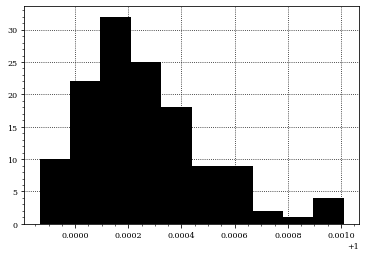

In [13]:
currbin=[f"ebin{i:02d}costbin{j:02d}" for i in range(11) for j in range(12)]
rhat=[]
for cbin in currbin:
    draws=np.array([sigma_df[cbin].values[i*5000:(i+1)*5000] for i in range(4)])
    print(np.shape(draws))
    rhat.append(az.rhat(draws))
plt.hist(rhat)

In [3]:
rel_err=np.abs(np.array(diagnostics_df.loc[['mcse']])[0]/np.array(diagnostics_df.loc[['sigma_median']])[0])
np.where(rel_err>=0.05)

(array([  0,  12, 111, 112, 124]),)

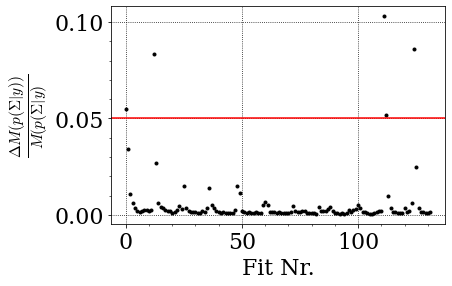

In [4]:
fig, ax = plt.subplots()
ax.plot(np.arange(132),np.abs(np.array(diagnostics_df.loc[['mcse']])[0]/np.array(diagnostics_df.loc[['sigma_median']])[0]),'.')
ax.set_xlabel('Fit Nr.')
ax.set_ylabel('$\\frac{\Delta M(p(\Sigma|y))}{M(p(\Sigma|y)}$')
#ax.set_ylim([0,0.5])
ax.axhline(y=0.05,color='red')
plt.show()
fig.savefig('./plots/mcse_hist.pdf',format='pdf',bbox_inches='tight',dpi=1000)

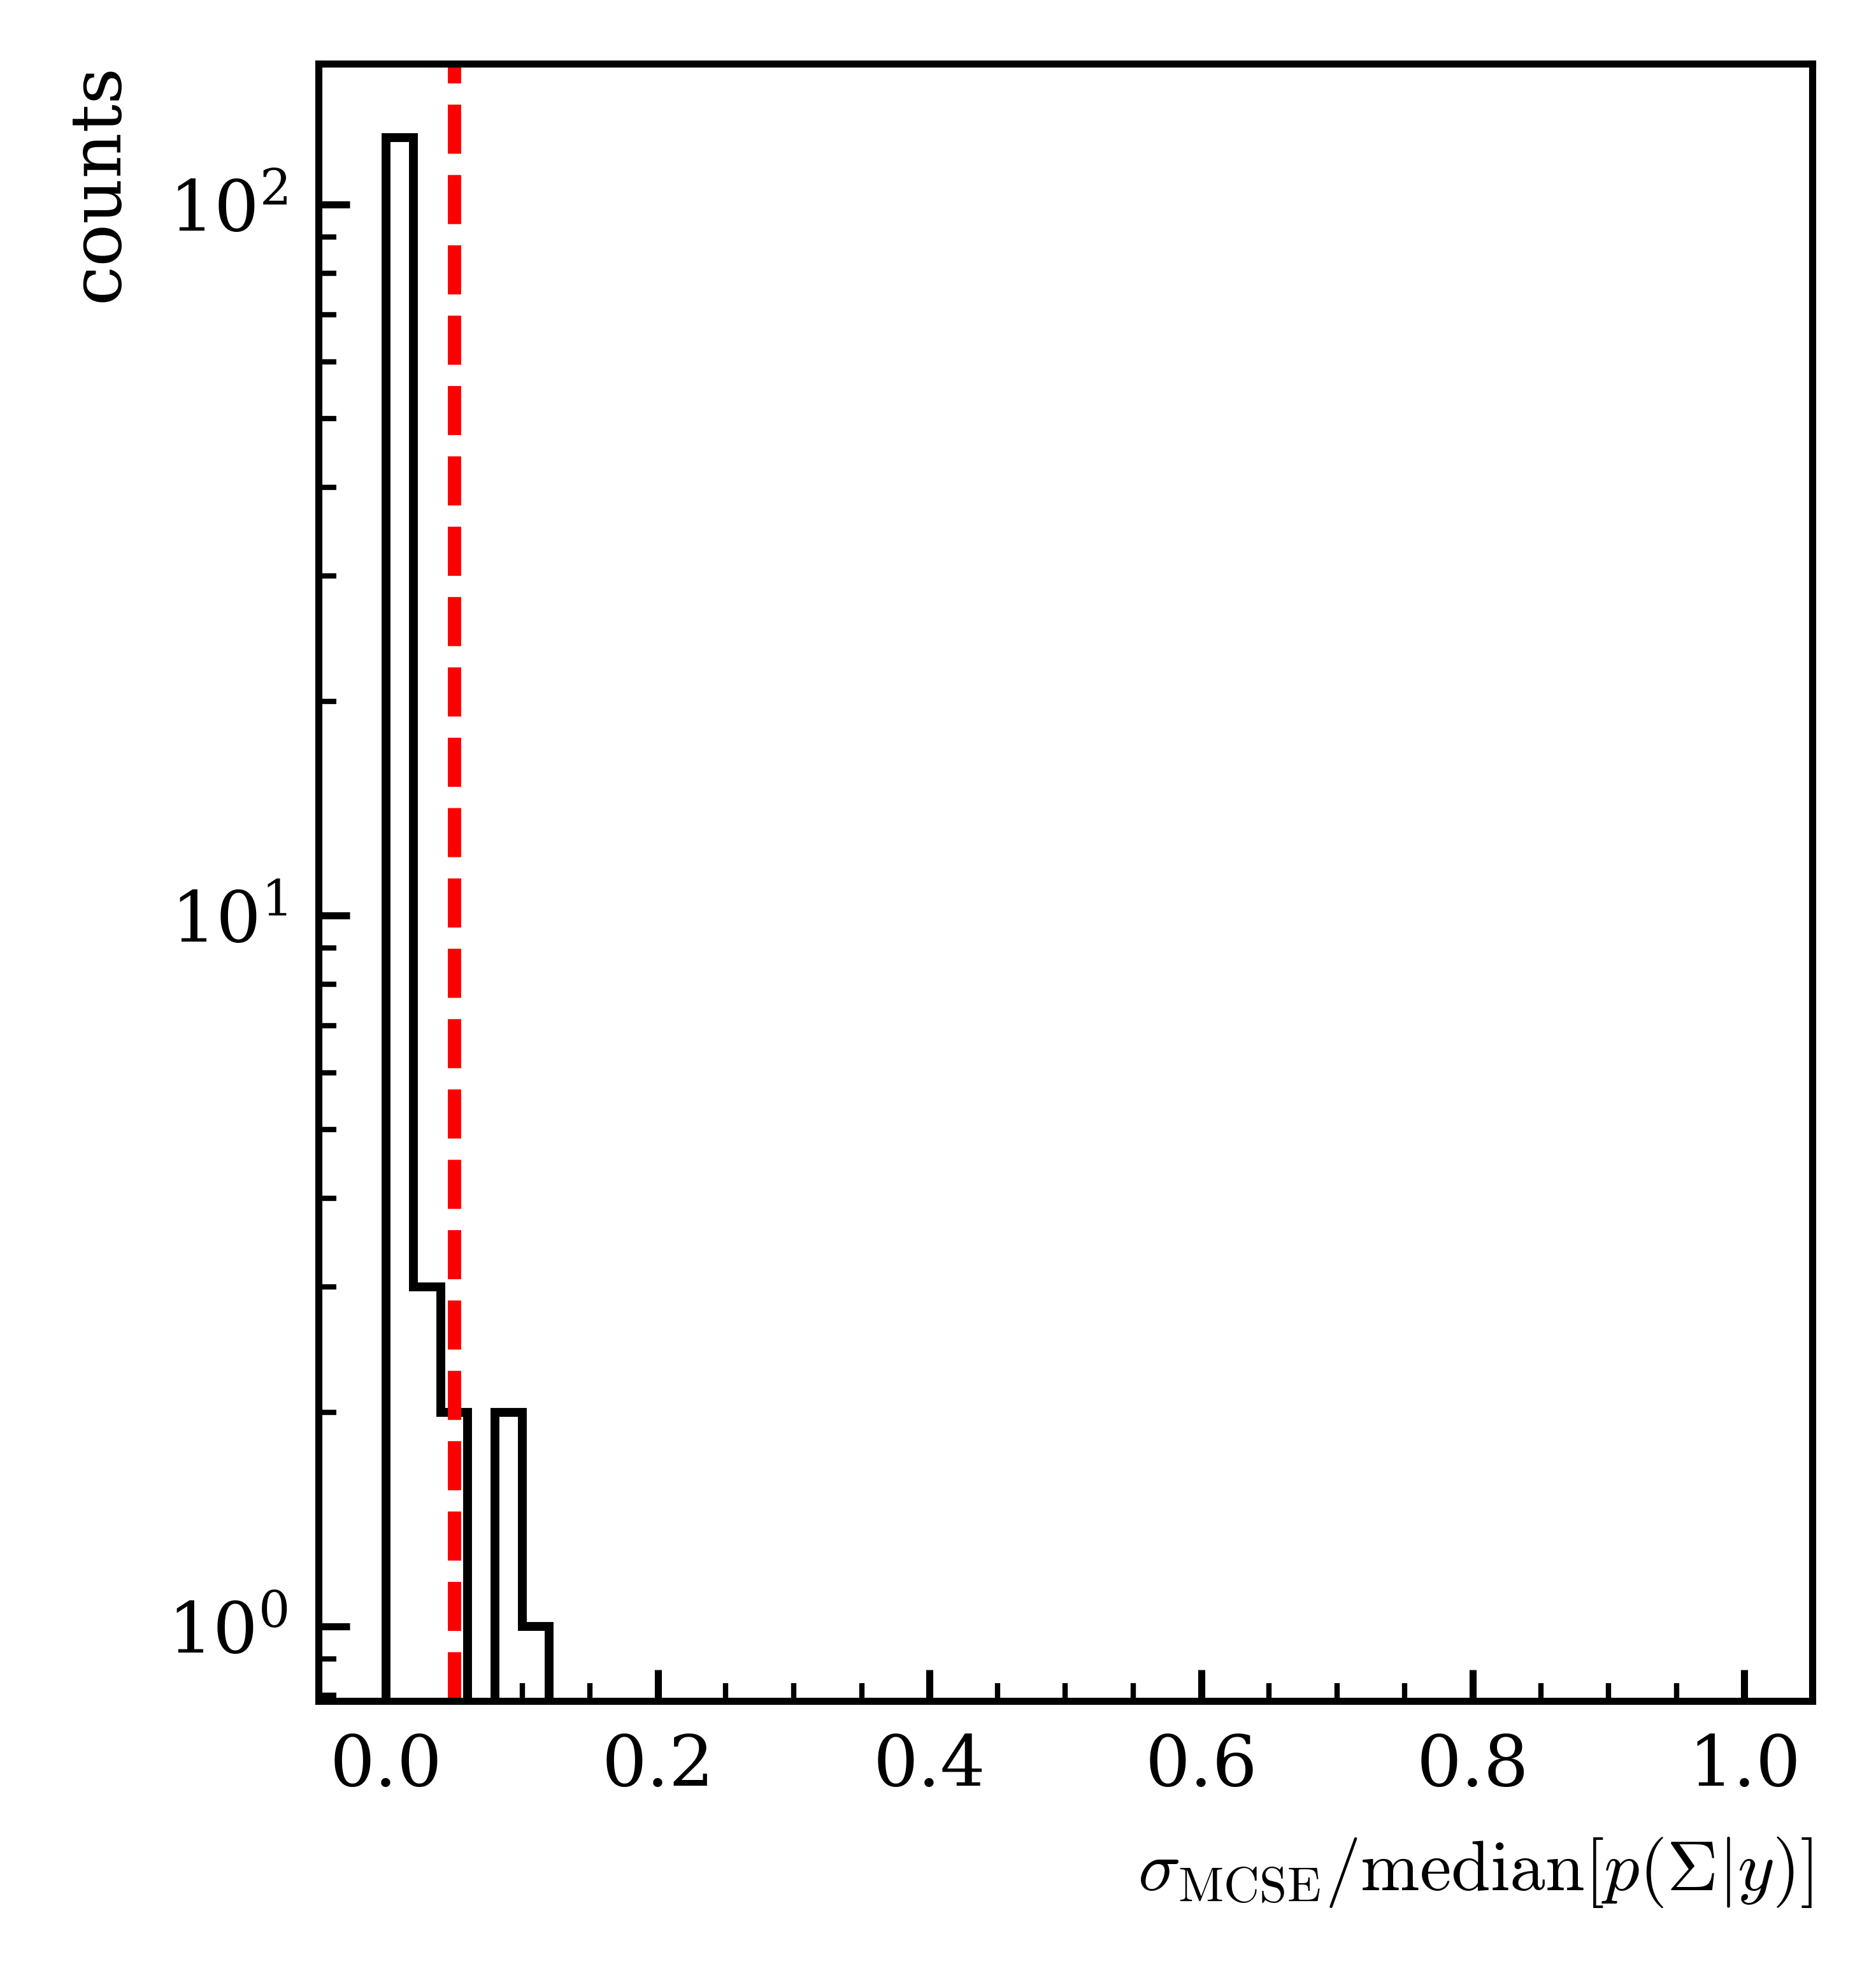

In [8]:
plt.rcParams['font.size']=8
fig, ax = plt.subplots(figsize=([15.3728/2.54/2,8.6472/2.54]),dpi=1000)

ax.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)/np.array(diagnostics_df.loc['sigma_median'].values)),histtype='step',log=True,range=[0,1],bins=50)
#ax.set_xlim([0,1])
#plt.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)),histtype='step',bins=20)
ax.set_xlabel(r'$\sigma_\mathrm{MCSE}/\mathrm{median}[p(\Sigma|y)]$',horizontalalignment='right',x=1.0)
ax.set_ylabel('counts',horizontalalignment='right',y=1.0)
ax.axvline(x=0.05,color='red',linestyle='--')
ax.grid(False)
ax.tick_params(axis='both',which='both',direction='in')
#plt.xscale('log')
#plt.savefig('./plots/toyMC_mcse_hist_raw.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()
fig.savefig('./plots/mcse_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')

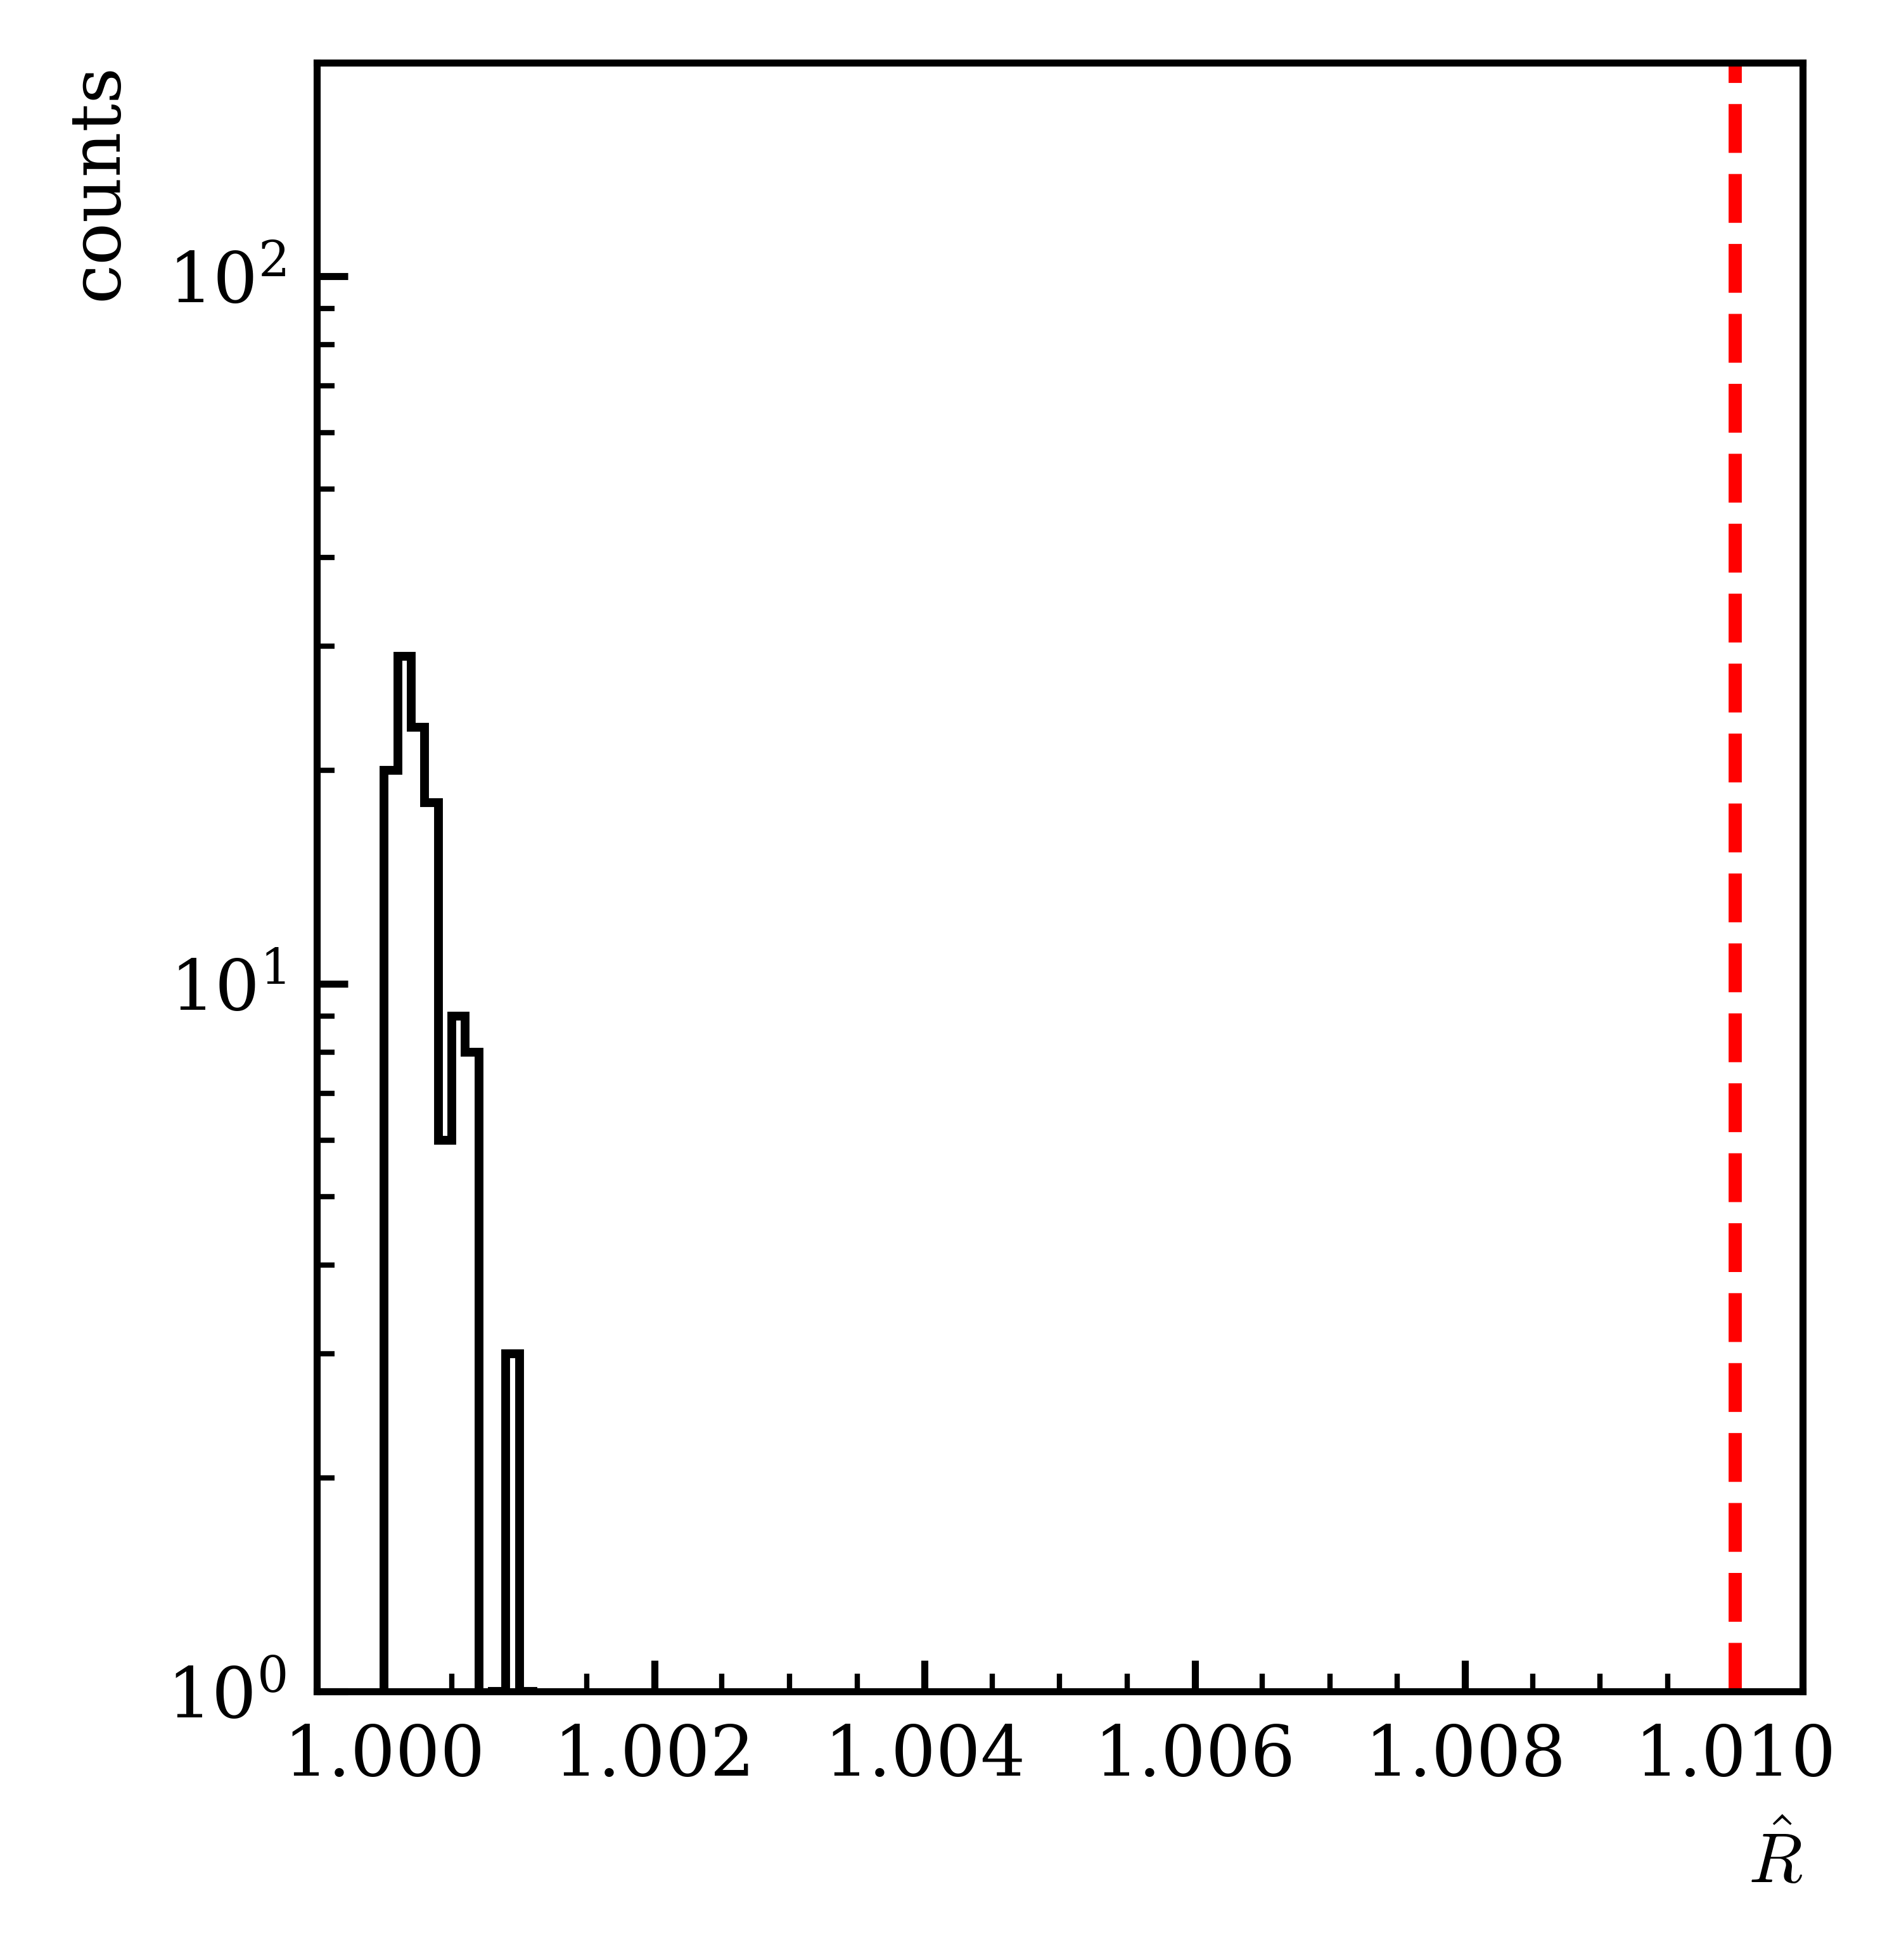

In [15]:
plt.rcParams['font.size']=8
fig, ax = plt.subplots(figsize=([15.3728/2.54/2,8.6472/2.54]),dpi=1000)
ax.tick_params(axis='both',which='both',direction='in')
#ax.hist(diagnostics_df.loc['rhat'].values,histtype='step',log=True,range=([1.00,1.05]),bins=20)
ax.hist(rhat,histtype='step',log=True,range=([1.00,1.01]),bins=100)
#ax.set_xlim([0,1])
#plt.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)),histtype='step',bins=20)
ax.set_xlabel(r'$\hat{R}$',horizontalalignment='right',x=1.0)
#ax.set_xlabel(r'$\sigma_\mathrm{MCSE}/\mathrm{median}[p(\Sigma|y)]$',horizontalalignment='right',x=1.0)
ax.set_ylabel('counts',horizontalalignment='right',y=1.0)
ax.set_ylim([1e0,2e2])
ax.axvline(x=1.01,color='red',linestyle='--')
ax.grid(False)
#plt.xscale('log')
#plt.savefig('./plots/toyMC_mcse_hist_raw.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()
fig.savefig('./plots/rhat_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')

In [33]:
fig,ax = plt.subplots(4,3,sharex='col',sharey='row',dpi=1000,figsize=(21.41492/2.54,0.8*15.3728/2.54))
plt.subplots_adjust(wspace=0, hspace=0)
plt.rcParams['font.size']=8
#fig.delaxes(ax[3,2]) #The indexing is zero-based here
ax[2,2].get_xaxis().set_visible(True)
ax[2,2].xaxis.set_tick_params(which='both', labelbottom=True)
farahs_data=pd.read_csv('../realdeal/Sigma_eta_datapoints_final_newsyserrorcalc.txt',sep=' ',header=None)
farahs_data.columns=['W','egamma','costheta','sigma','stat_error','sys_error','idk']
counter=0
for i in range(4):
    for j in range(3):
        if(j==0 and i==0):
            ax[i][j].set_ylabel('$\Sigma$',horizontalalignment='right',y=1.0,fontsize=8)
        if(j==2 and (i==3)):
            ax[i][j].set_xlabel('$\cos\\theta_{\eta}^{\mathrm{CMS}}$',horizontalalignment='right',x=1.0,fontsize=8)
        ax[i][j].grid(False)
        ax[i][j].tick_params(axis='both',which='both',direction='in')
        ax[i][j].set_xlim([-1.2,1.2])
        ax[i][j].set_ylim([-1.5,1.5])
        x=[-1+2/12/2+(i)*2/12 for i in range(12)]
        if(counter<11):
            #sigma (point estimate) from event yield asymmetries
            ax[i][j].errorbar(x=x,
                              y=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['sigma']for j in range(12)],
                              yerr=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['error'] for j in range(12)],
                              fmt='s',markersize=4.,elinewidth=0.8,color='peachpuff',label='$\chi^2$ - fit')
            #sigma (point estimate) from event based fit
            ax[i][j].errorbar(x=x,y=farahs_data['sigma'][counter*12:counter*12+12],
                              yerr=farahs_data['stat_error'][counter*12:counter*12+12],
                              fmt='v',markersize=4.,elinewidth=0.8,color='darkorange',label='Event based fit [Afz19]')
            #plot sigma posterior obtained from event based fit
            vp=ax[i][j].violinplot([sigma_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(12)],
                                   x,
                                showmeans=False, showextrema=False, showmedians=False,widths=0.3)
            #sigma posterior obtained from event yield asymmetries
            vpalt=ax[i][j].violinplot([sigma_alt_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(12)],
                                      x,
                                 showmeans=False, showextrema=False, showmedians=False,widths=0.3)
            ax[i][j].text(0,-1,f'${1130+counter*60}$ MeV $\leq E_\gamma < {1130+(counter+1)*60}$ MeV',
                          fontsize=8,ha='center',va='center')
            #cosmetics
            for b in vp['bodies']:
                # get the center
                m = np.mean(b.get_paths()[0].vertices[:, 0])
                # modify the paths to not go further right than the center
                b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
                b.set_alpha(.5)
                b.set_color('navy')
            for b in vpalt['bodies']:
                # get the center
                m = np.mean(b.get_paths()[0].vertices[:, 0])
                # modify the paths to not go further right than the center
                b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
                b.set_alpha(.2)
                b.set_color('navy')    
        counter+=1
lines,labels = ax[0][0].get_legend_handles_labels() 
patch1 = mpatches.Patch(color='navy', label='bayesian fit (unbinned)',alpha=.5)
patch = mpatches.Patch(color='navy', label='bayesian fit (binned)',alpha=.1)

lines.append(patch)
lines.append(patch1)

ax[3,2].legend(handles=lines,frameon=False,fancybox=False,loc='center',fontsize=8)        
plt.show()
fig.savefig(f'./plots/sigma_eta.pdf',format='pdf',bbox_inches='tight',dpi=1000)

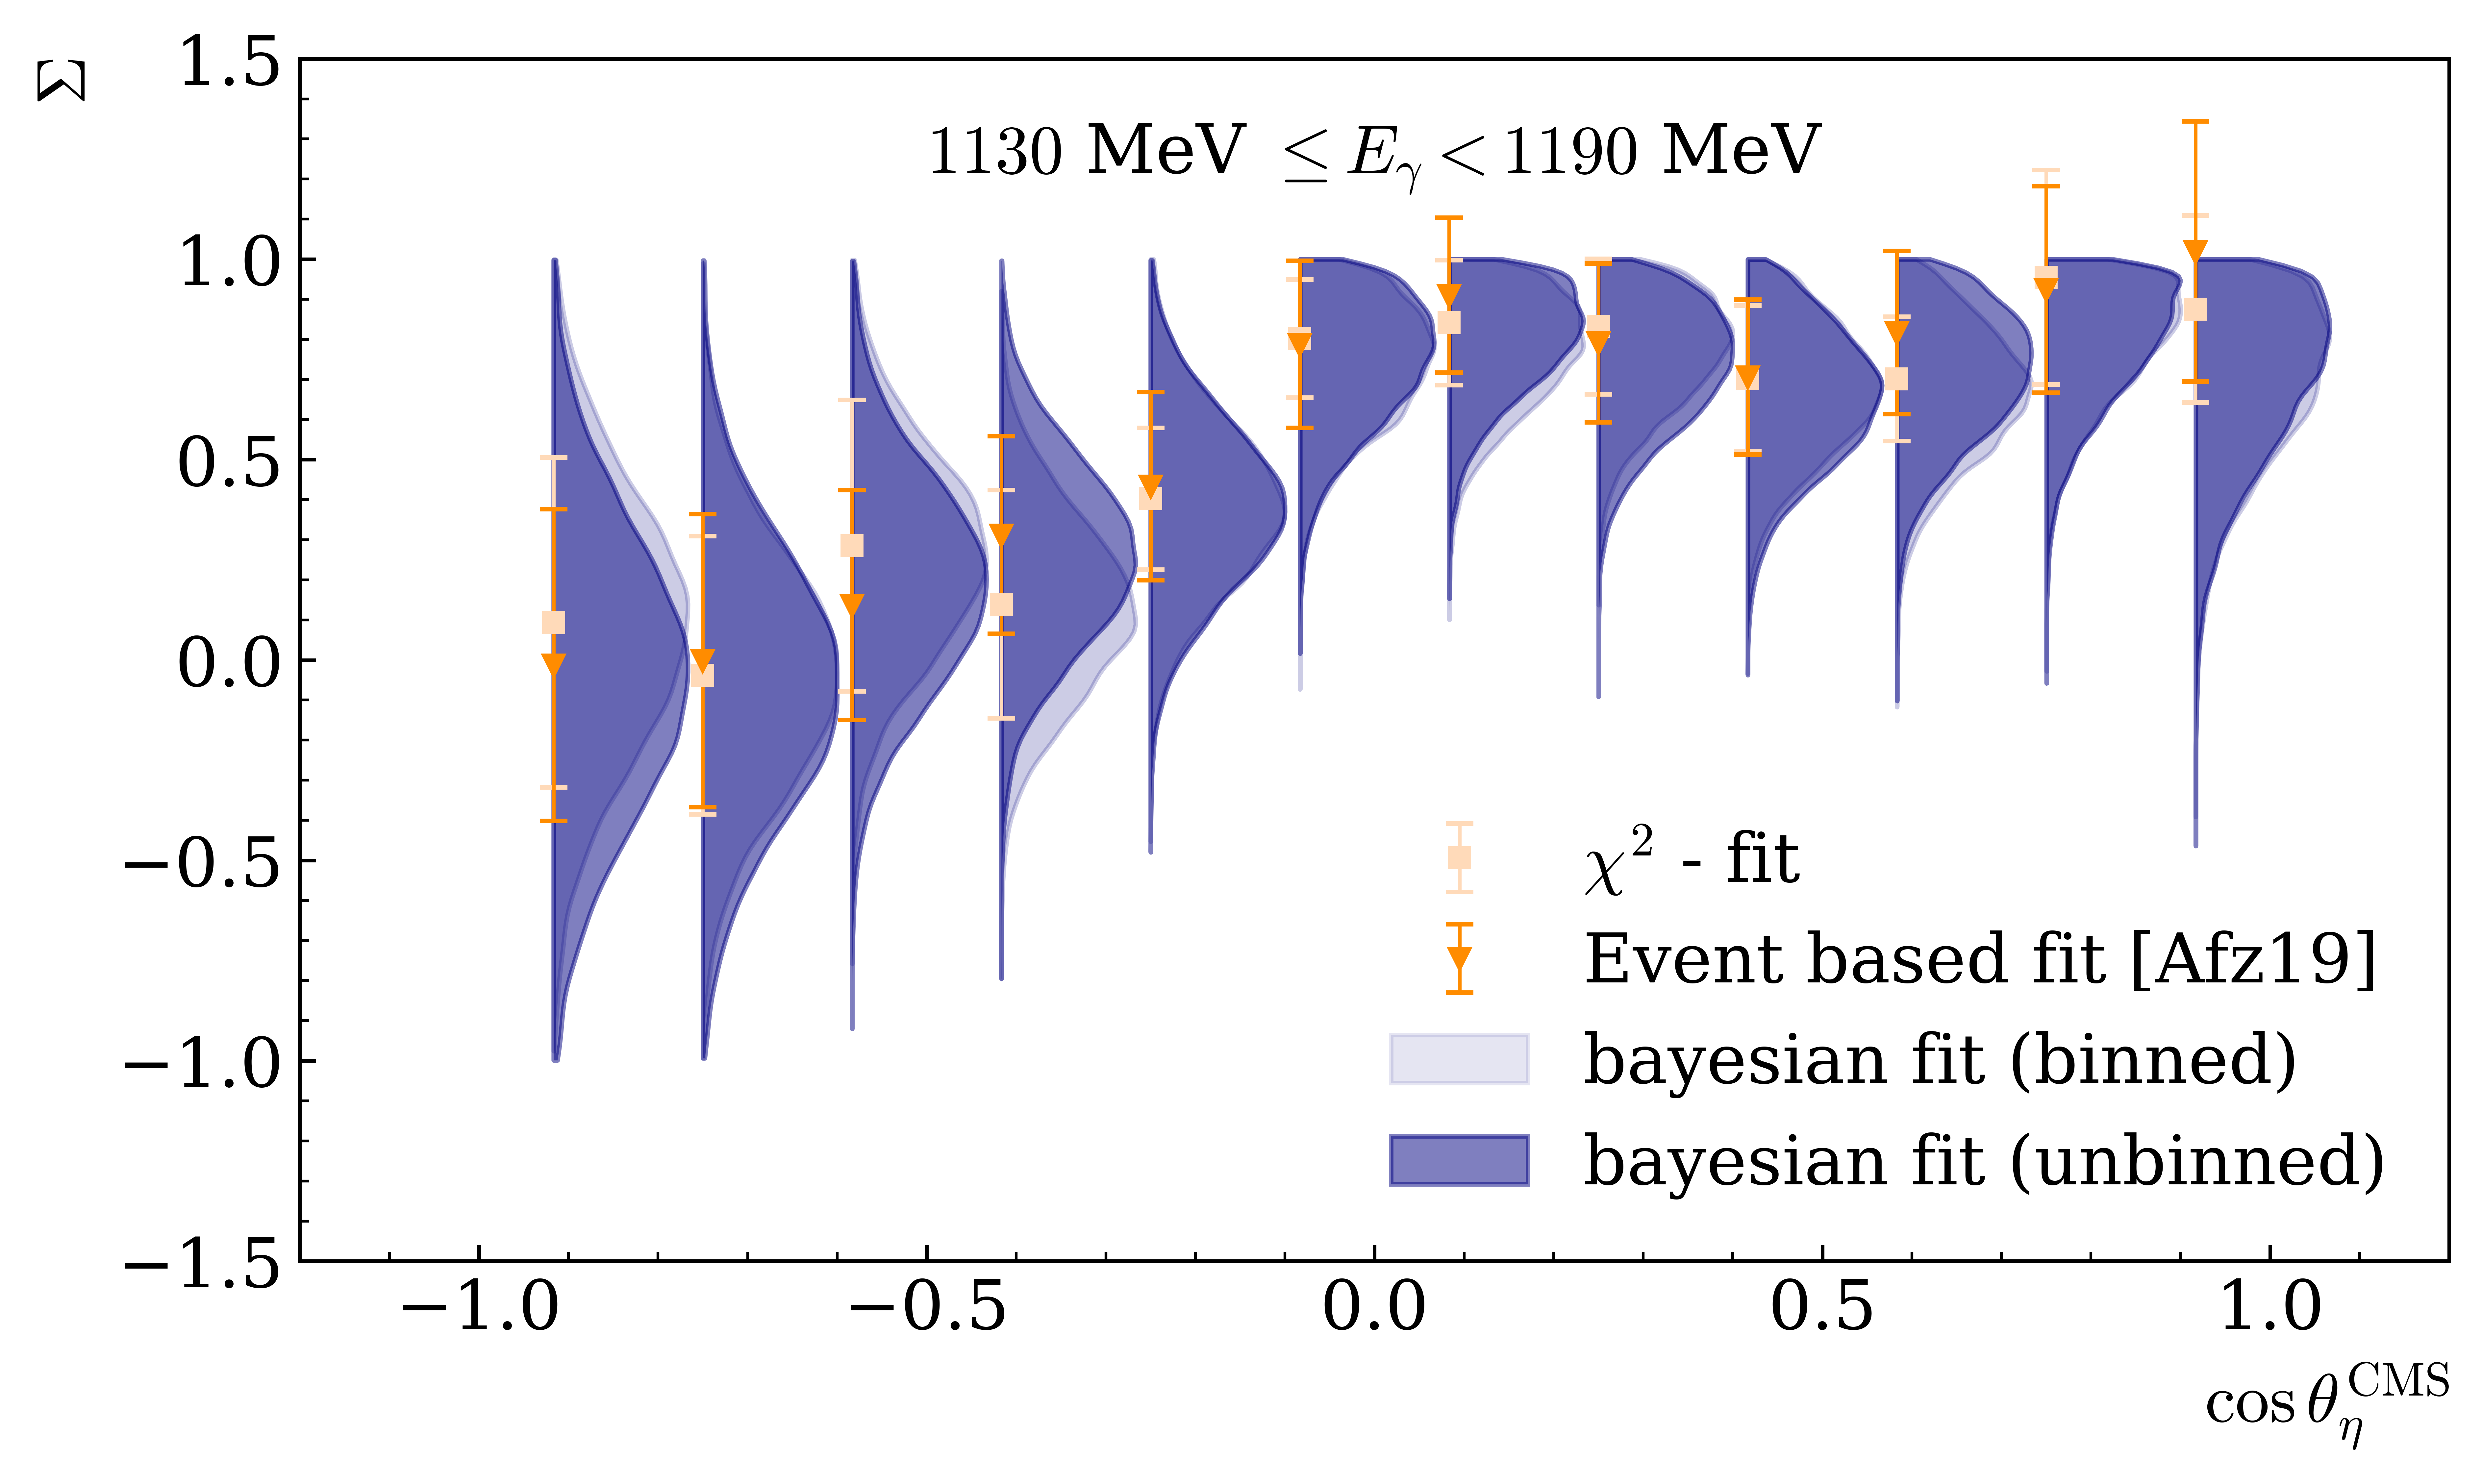

In [19]:
fig,ax = plt.subplots(dpi=1000,figsize=(21.41492/2.54,0.8*15.3728/2.54))
plt.rcParams['font.size']=15
#fig.delaxes(ax[3,2]) #The indexing is zero-based here
ax.get_xaxis().set_visible(True)
ax.xaxis.set_tick_params(which='both', labelbottom=True)
farahs_data=pd.read_csv('../realdeal/Sigma_eta_datapoints_final_newsyserrorcalc.txt',sep=' ',header=None)
farahs_data.columns=['W','egamma','costheta','sigma','stat_error','sys_error','idk']
counter=0
    
ax.set_ylabel('$\Sigma$',horizontalalignment='right',y=1.0,fontsize=15)
ax.set_xlabel('$\cos\\theta_{\eta}^{\mathrm{CMS}}$',horizontalalignment='right',x=1.0,fontsize=15)
ax.grid(False)
ax.tick_params(axis='both',which='both',direction='in')
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.5,1.5])
x=[-1+2/12/2+(i)*2/12 for i in range(12)]
if(counter<1):
    #sigma (point estimate) from event yield asymmetries
    ax.errorbar(x=x,
              y=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['sigma']for j in range(12)],
                 yerr=[sigma_chi2_df[f"ebin{counter:02d}costbin{j:02d}"]['error'] for j in range(12)],
                         fmt='s',markersize=4.,elinewidth=0.8,color='peachpuff',label='$\chi^2$ - fit')
    #sigma (point estimate) from event based fit
    ax.errorbar(x=x,y=farahs_data['sigma'][counter*12:counter*12+12],
                       yerr=farahs_data['stat_error'][counter*12:counter*12+12],
                         fmt='v',markersize=4.,elinewidth=0.8,color='darkorange',label='Event based fit [Afz19]')
     #plot sigma posterior obtained from event based fit
    vp=ax.violinplot([sigma_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(12)],
                            x,
                        showmeans=False, showextrema=False, showmedians=False,widths=0.3)
    #sigma posterior obtained from event yield asymmetries
    vpalt=ax.violinplot([sigma_alt_df[f"ebin{counter:02d}costbin{j:02d}"] for j in range(12)],
                                 x,
                            showmeans=False, showextrema=False, showmedians=False,widths=0.3)
    ax.text(0,1.25,f'${1130+counter*60}$ MeV $\leq E_\gamma < {1130+(counter+1)*60}$ MeV',
                    fontsize=15,ha='center',va='center')
     #cosmetics
    for b in vp['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_alpha(.5)
        b.set_color('navy')
    for b in vpalt['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
         # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_alpha(.2)
        b.set_color('navy')    
        counter+=1
lines,labels = ax.get_legend_handles_labels() 
patch1 = mpatches.Patch(color='navy', label='bayesian fit (unbinned)',alpha=.5)
patch = mpatches.Patch(color='navy', label='bayesian fit (binned)',alpha=.1)

lines.append(patch)
lines.append(patch1)

ax.legend(handles=lines,frameon=False,fancybox=False,loc='lower right',fontsize=15)        
plt.show()
fig.savefig(f'./plots/sigma_eta_bin.pdf',format='pdf',bbox_inches='tight',dpi=1000)

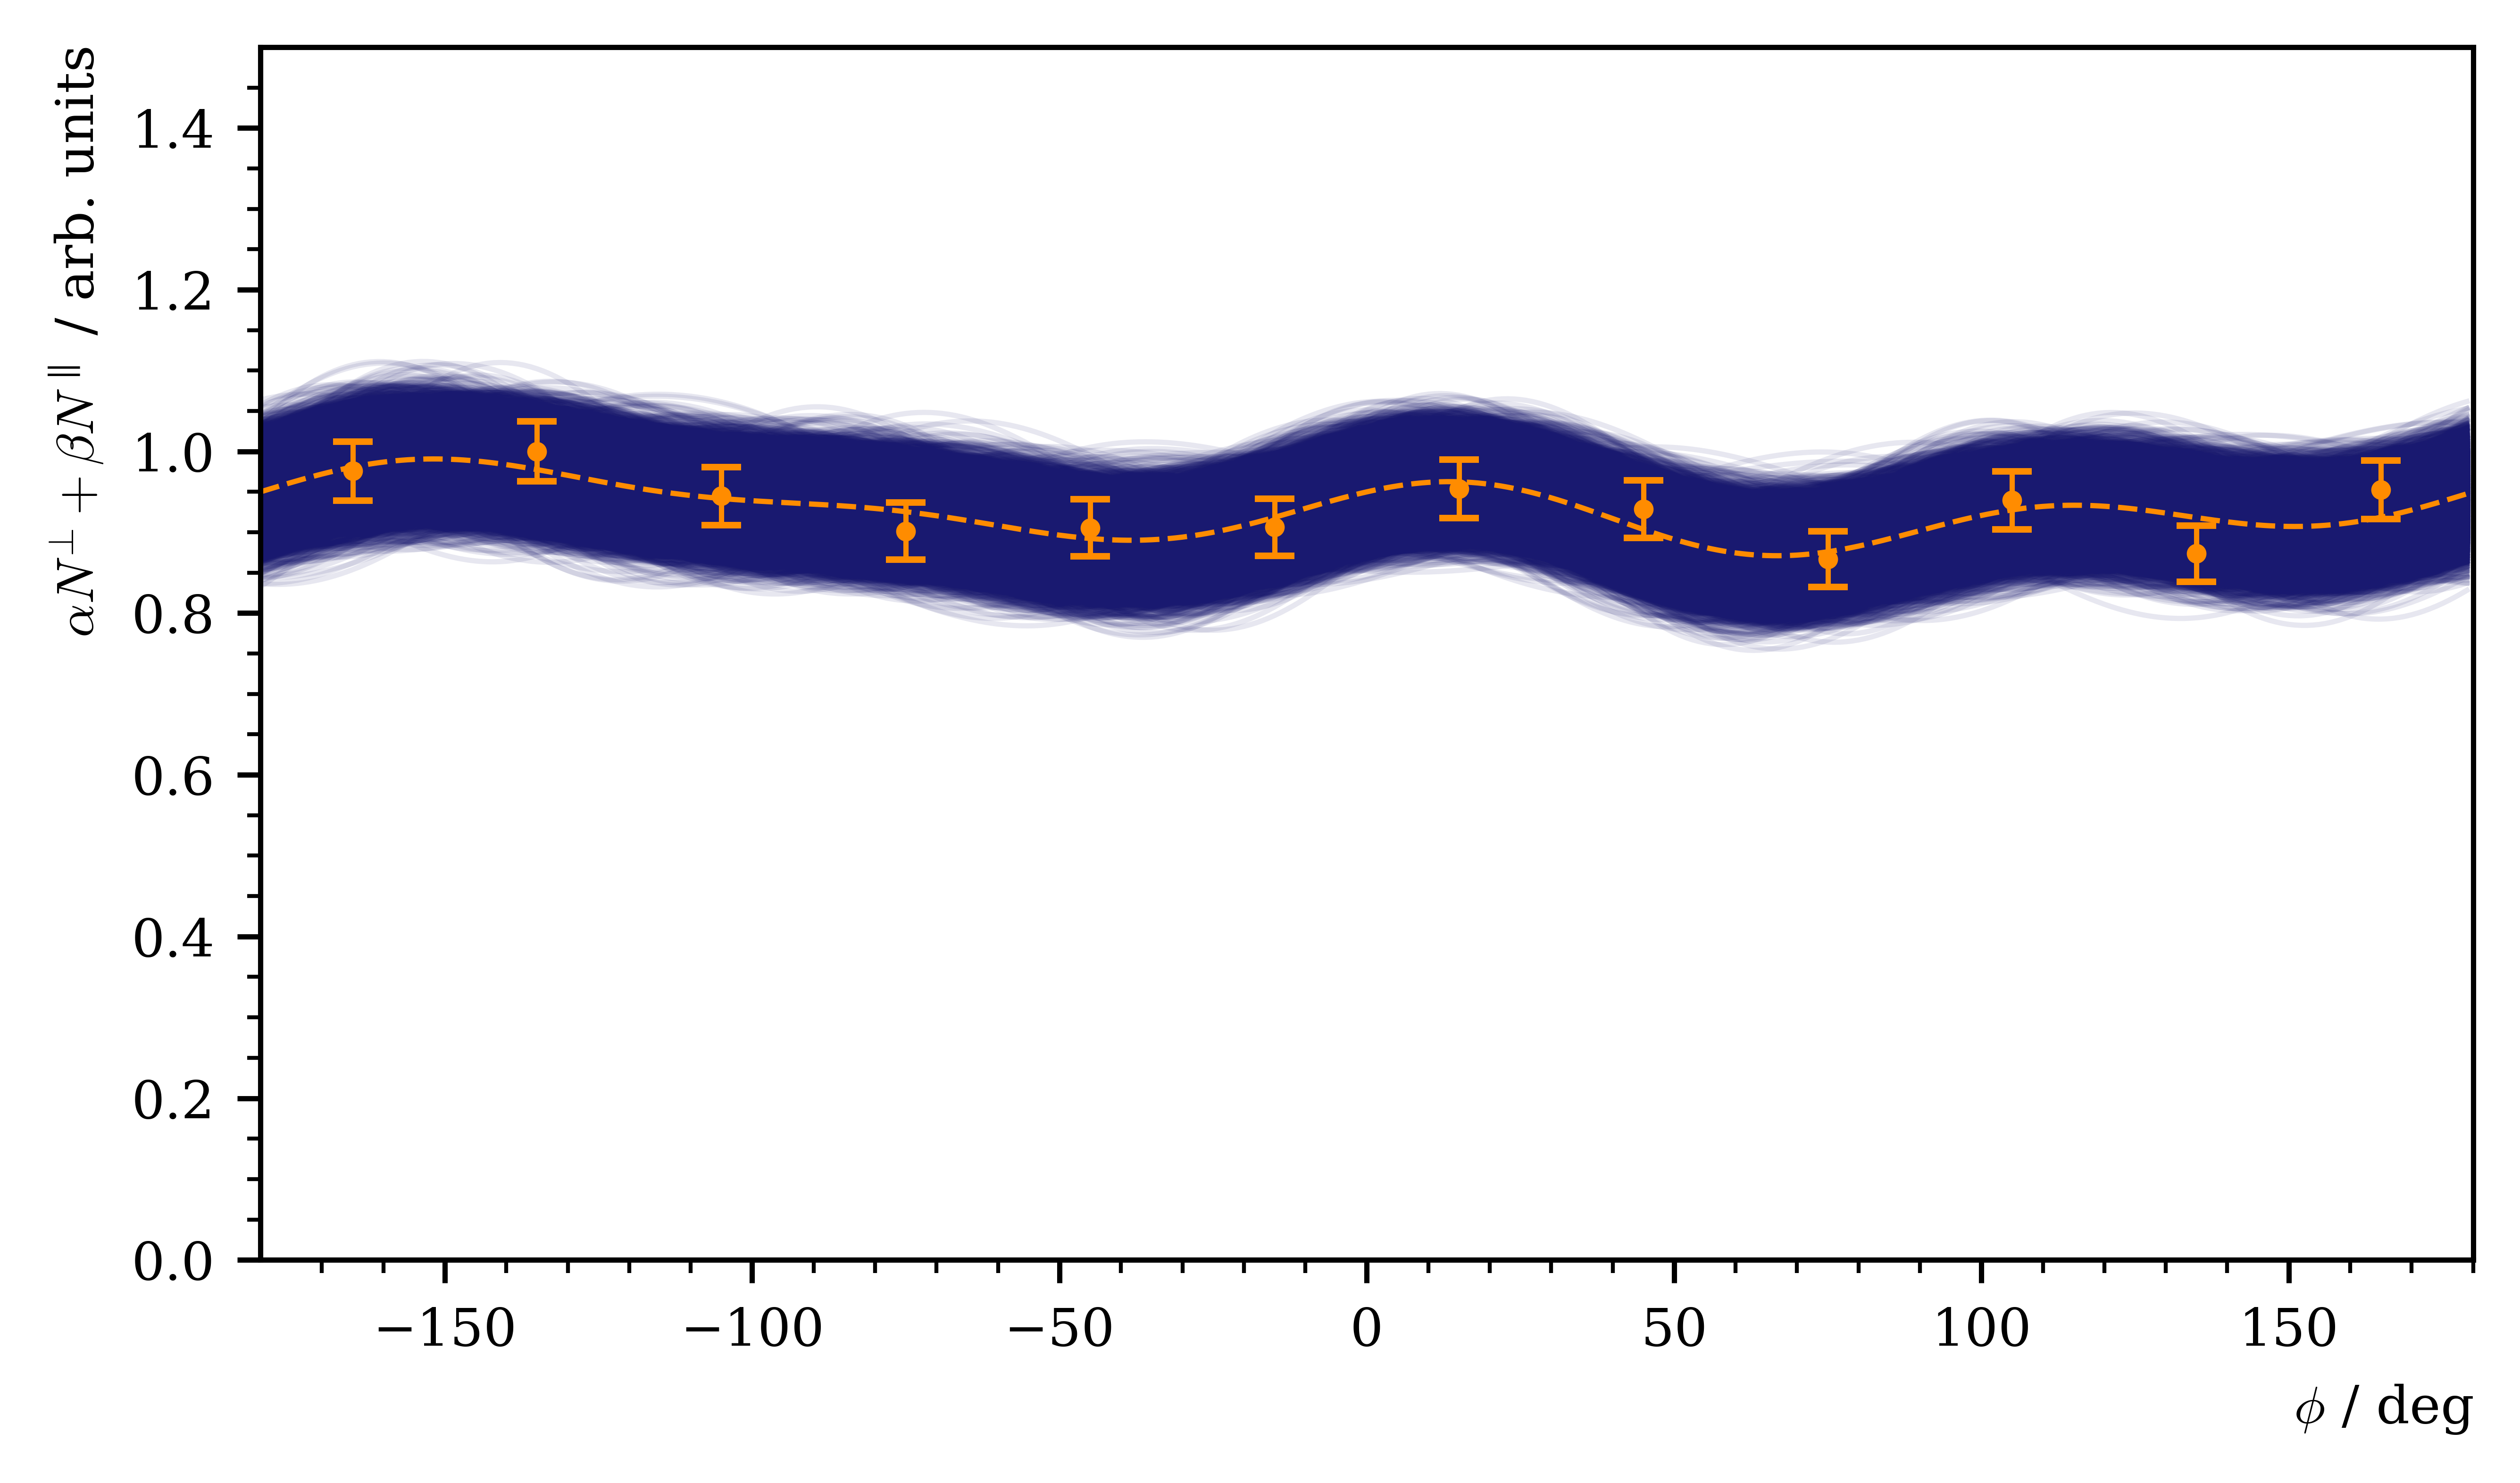

In [ ]:
plt.rcParams['font.size']=8
#read data
i=2 # define which bin to use
j=6
samples=pd.read_csv(f'samples_ebin{i:02d}costbin{j:02d}.txt',index_col=0)
summary=pd.read_csv(f'summary_ebin{i:02d}costbin{j:02d}.txt',index_col=0)

df=pd.read_csv(f"ebin{i:02d}/ebin{i:02d}costbin{j:02d}.txt",sep="\t")
df.columns=['pol','phi','weight']
#select only prmpt events
p45=df.loc[(df['weight']==1)&(df['pol']>0)].reset_index(drop=True)
m45=df.loc[(df['weight']==1)&(df['pol']<0)].reset_index(drop=True)
hp45=r.TH1F("p45","p45",12,-180,180)
hm45=r.TH1F("m45","m45",12,-180,180)
#histogram them
for i in p45['phi'].values:
    hp45.Fill(i)
for i in m45['phi'].values:
    hm45.Fill(i)
#normalize    
norm_p = 1./hp45.Integral()
norm_m = 1./hm45.Integral()
hp45.Scale(norm_p)
hm45.Scale(norm_m)
#build polarization weighted sum
pol_p45=np.abs(np.mean(p45['pol']))
pol_m45=np.abs(np.mean(m45['pol']))
hp45.Add(hp45,hm45,pol_m45/(pol_p45+pol_m45),pol_p45/(pol_m45+pol_p45))
hp45.Scale(1./hp45.GetMaximum())
#write values of histo to numpy array
asym=[]
asym_err=[]
phi=[]
for i in range(hp45.GetNbinsX()):
    asym.append(hp45.GetBinContent(i+1))
    asym_err.append(hp45.GetBinError(i+1))
    phi.append(hp45.GetBinCenter(i+1))
asym=np.array(asym)
asym_err=np.array(asym_err)
phi=np.array(phi)
xx=np.arange(-180,180)

#plot results
fig, ax = plt.subplots(figsize=[15.3728/2.54,8.6472/2.54],dpi=1000)
ax.errorbar(x=phi,y=asym,yerr=asym_err,fmt='.',color='darkorange',zorder=3,label='data',markersize=4,elinewidth=0.8)
#get ALL values of fourier coeff
eff_list=[]
for i in range(20000):
    #get mean values of fourier coeff
    tmp_a=[samples[f'a[{j+1}]'][i] for j in range(4)]
    tmp_b=[samples[f'b[{j+1}]'][i] for j in range(4)]
    #put them in efficiency function
    def tmp_eff(x,c):
        val=1 # a0=0,b0=1
        for i in range(4):
            val+=tmp_a[i]*np.sin((i+1)*x*np.pi/180)+tmp_b[i]*np.cos((i+1)*x*np.pi/180)
        return c*val 
    popt,pcov = curve_fit(tmp_eff,xdata=phi,ydata=asym,p0=1,sigma=asym_err)
    eff_list.append(tmp_eff(xx,popt))
    #ax.plot(xx,eff(xx,popt),color='midnightblue',alpha=0.5)
for i in range(20000):
    if(i==0):
        ax.plot(xx,eff_list[i],color='midnightblue',alpha=0.1,label='PPC',linewidth=0.8)
    else:
        ax.plot(xx,eff_list[i],color='midnightblue',alpha=0.1,linewidth=0.8)
#get mean values of fourier coeff
a=[summary['Mean'][f'a[{i+1}]'] for i in range(4)]
b=[summary['Mean'][f'b[{i+1}]'] for i in range(4)]
#put them in efficiency function
def eff(x,c):
    val=1 # a0=0,b0=1
    for i in range(4):
        val+=a[i]*np.sin((i+1)*x*np.pi/180)+b[i]*np.cos((i+1)*x*np.pi/180)
    return c*val 
popt,pcov = curve_fit(eff,xdata=phi,ydata=asym,p0=1,sigma=asym_err)
ax.plot(xx,eff(xx,popt),color='darkorange',ls='--',label='Mean of PPC',linewidth=0.8)

    
    
ax.set_xlim([-180,180])
ax.set_ylim([0,1.5])
ax.set_xlabel("$\phi$ / deg",horizontalalignment='right',x=1.0)
ax.set_ylabel(r"$\alpha N^{\bot} + \beta N^{\parallel} $ / arb. units",horizontalalignment='right',y=1.0)
ax.grid(False)
#plt.legend()
plt.show()
fig.savefig('./plots/eff_PPC.png',format='png',dpi=1000,bbox_inches='tight')

In [24]:
fracs=[]
for col in sigma_alt_df.columns:
    sigma_dist=np.array(sigma_alt_df[col].values)
    sigma_chi2, err_chi2 =sigma_chi2_df[col].values
    lower=sigma_chi2-err_chi2
    upper=sigma_chi2+err_chi2
    #frac=len(sigma_dist[(sigma_dist>lower) & (sigma_dist<upper)])/len(sigma_dist)
    frac=np.std(sigma_dist)/err_chi2
    fracs.append(frac)

In [25]:
np.mean(fracs)

0.9971920768682928